In [1]:
import numpy as np
import subprocess
import os
import glob
import yaml
import xarray as xr
import math
import matplotlib.pyplot as plt
import goat_plots as gp
import goat_io as io
import goat_tools as gt
import goat_means as gm

Text(0, 0.5, 'Global Mean Temperature')

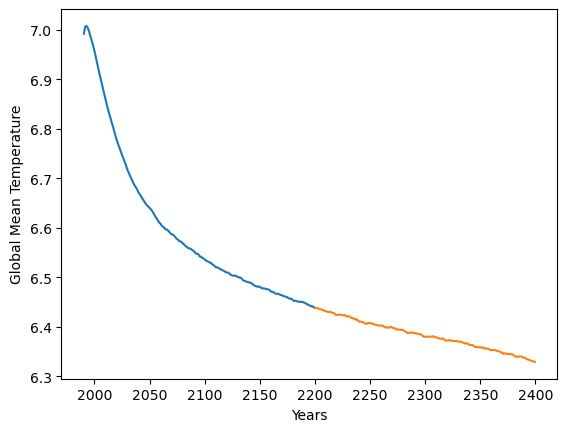

In [2]:
gp.plot_ts_ma3d('z004', 1990, 2200, 'to', 1, 'norm')
gp.plot_ts_ma3d('z004', 2200, 2400, 'to', 1, 'norm')
plt.xlabel("Years")
plt.ylabel("Global Mean Temperature")

Text(0, 0.5, 'Global Mean tos')

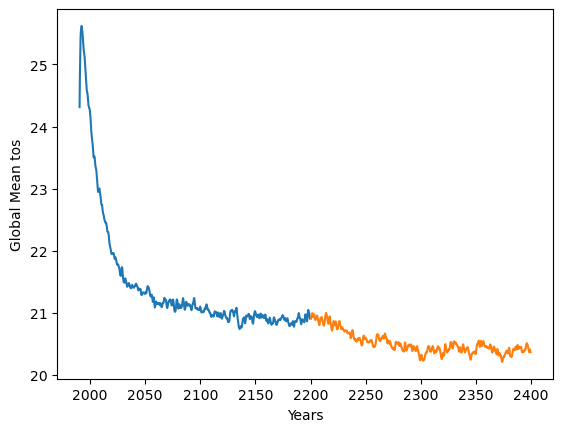

In [4]:
gp.plot_ts_ma2d('z004', 1990, 2200, 'tos', 1, 'norm')
gp.plot_ts_ma2d('z004', 2200, 2400, 'tos', 1, 'norm')
plt.xlabel("Years")
plt.ylabel("Global Mean tos")

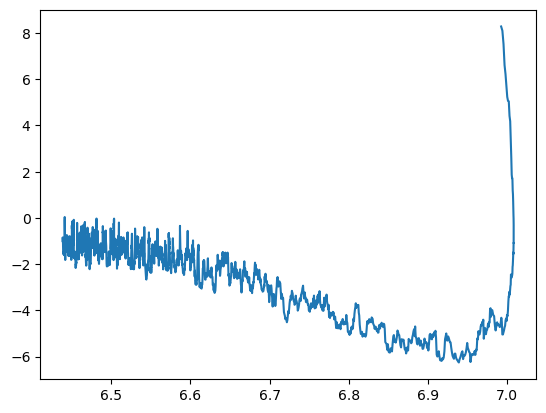

In [3]:
gp.gregory_plot_ma3d('z004', 1990, 2200, 'to', 'qt_oce')

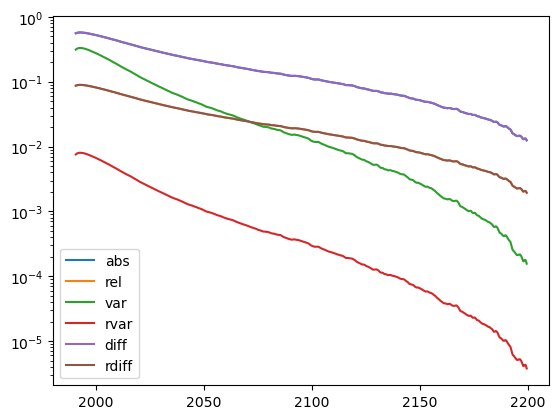

In [2]:
gp.timeseries_anomaly_set('z001', 1990, 2200, 2200, 2250, 'to')
plt.yscale('log')

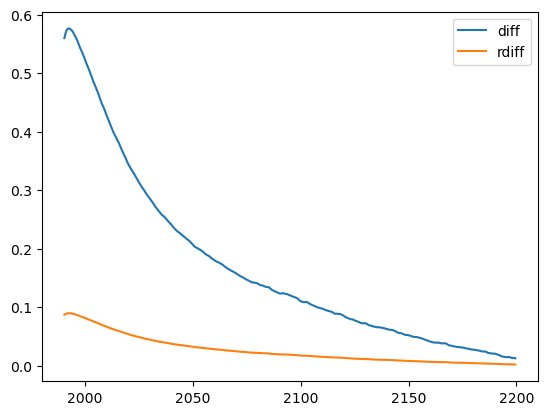

In [3]:
gp.timeseries_diff('z001', 1990, 2200, 2200, 2250, 'to')

Text(0.5, 1.0, 'Cost function / Temperature anomaly')

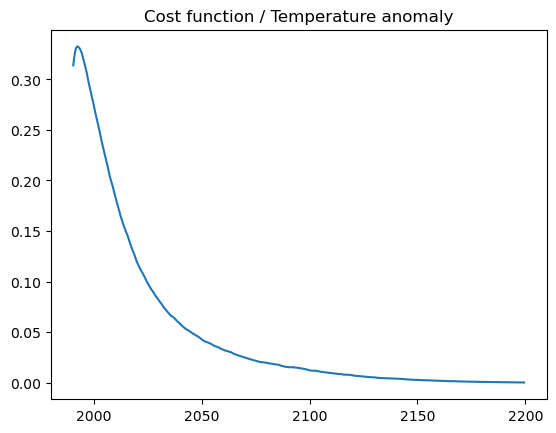

In [2]:
gp.timeseries_mean_anomalies('z001', 1990, 2200, 2200, 2250, 'to', 'var')
plt.title('Cost function / Temperature anomaly')

Text(0.5, 1.0, 'Cost function / Temperature anomaly')

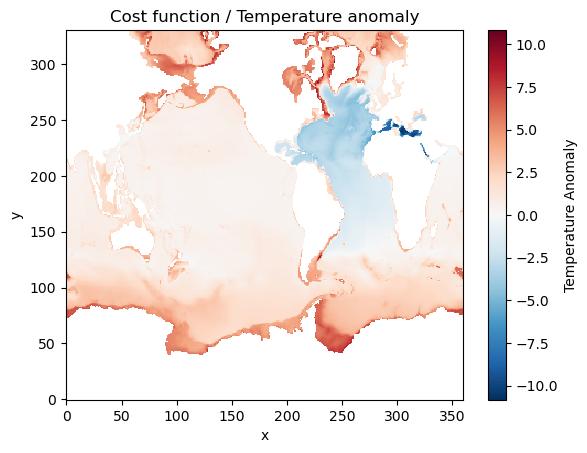

In [5]:
gp.map_mean_anomaly('omga', 2000, 2200, 2240, 'to', 'diff')
plt.title('Cost function / Temperature anomaly')

In [2]:
meanfield = gm.mean_state('z001', 2200, 2250)

In [3]:
anomaly = gm.anomaly_local('z001', 2000, meanfield)

In [4]:
anomaly = anomaly.rename_vars({'to': 'anomaly'})
anomaly

<xarray.Dataset>
Dimensions:         (y: 148, x: 180, time: 12, z: 31, axis_nbounds: 2)
Coordinates:
    nav_lat_grid_T  (y, x) float32 -78.19 -78.19 -78.19 ... -1.0 -1.0 -1.0
    nav_lon_grid_T  (y, x) float32 80.0 82.0 84.0 86.0 ... -1.0 -1.0 -1.0 -1.0
    time_centered   (time) object dask.array<chunksize=(1,), meta=np.ndarray>
  * time            (time) object 2000-01-16 12:00:00 ... 2000-12-16 12:00:00
  * z               (z) float32 -5.0 -15.0 -25.0 ... -4.75e+03 -5.25e+03
Dimensions without coordinates: y, x, axis_nbounds
Data variables: (12/23)
    deptht_bounds   (z, axis_nbounds) float32 dask.array<chunksize=(31, 2), meta=np.ndarray>
    e3t             (time, z, y, x) float32 dask.array<chunksize=(1, 31, 148, 180), meta=np.ndarray>
    anomaly         (time, z, y, x) float32 dask.array<chunksize=(1, 31, 148, 180), meta=np.ndarray>
    so              (time, z, y, x) float32 dask.array<chunksize=(1, 31, 148, 180), meta=np.ndarray>
    tos             (time, y, x) float32 dask.array<chunksize=(1, 148, 180), meta=np.ndarray>
    sos             (time, y, x) float32 dask.array<chunksize=(1, 148, 180), meta=np.ndarray>
    ...              ...
    qt_oce          (time, y, x) float32 dask.array<chunksize=(1, 148, 180), meta=np.ndarray>
    sfx             (time, y, x) float32 dask.array<chunksize=(1, 148, 180), meta=np.ndarray>
    taum            (time, y, x) float32 dask.array<chunksize=(1, 148, 180), meta=np.ndarray>
    windsp          (time, y, x) float32 dask.array<chunksize=(1, 148, 180), meta=np.ndarray>
    precip          (time, y, x) float32 dask.array<chunksize=(1, 148, 180), meta=np.ndarray>
    snowpre         (time, y, x) float32 dask.array<chunksize=(1, 148, 180), meta=np.ndarray>

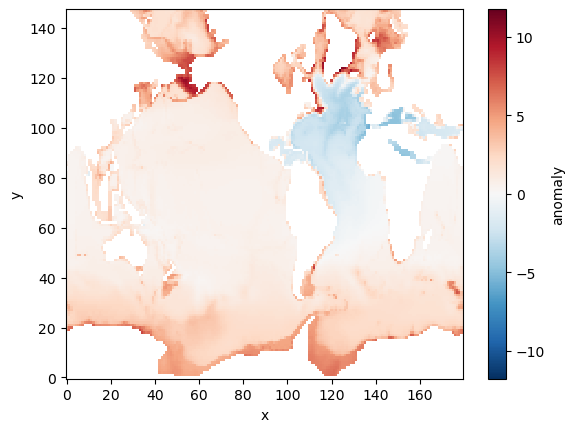

: 

In [5]:
df = gm.elements('z001')
anomaly['anomaly'].weighted(df['dz']).mean(dim=['z','time']).plot()

Text(0.5, 1.0, 'tos anomaly 2100 vs 2050')

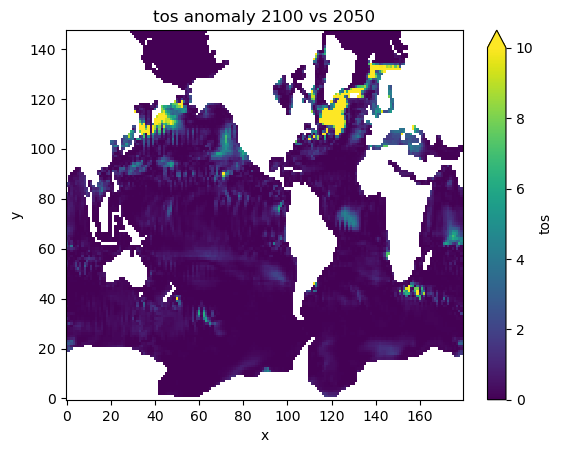

In [3]:
gp.map2d_anomaly('z001', 2200, 2250, 6, 'tos', 0, 10)
plt.title('tos anomaly 2100 vs 2050')

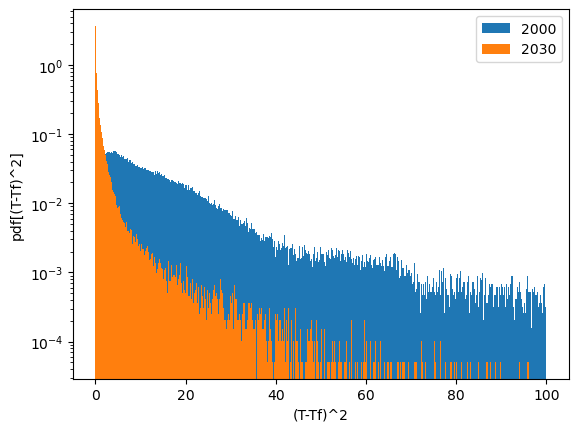

In [16]:
field1 = gp.hist2d_var('z001', 2000, 2050, 6, 'tos')
field2 = gp.hist2d_var('z001', 2030, 2050, 6, 'tos')
x1=field1.values.flatten()
x2=field2.values.flatten()
plt.yscale('log')
plt.hist(x1, bins = 1000, range=(0,100), density=True)
plt.hist(x2, bins = 1000, range=(0,100), density=True)
plt.xlabel("(T-Tf)^2")
plt.ylabel("pdf[(T-Tf)^2]")
plt.gca().legend(('2000','2030'))

(-5000.0, 0.0)

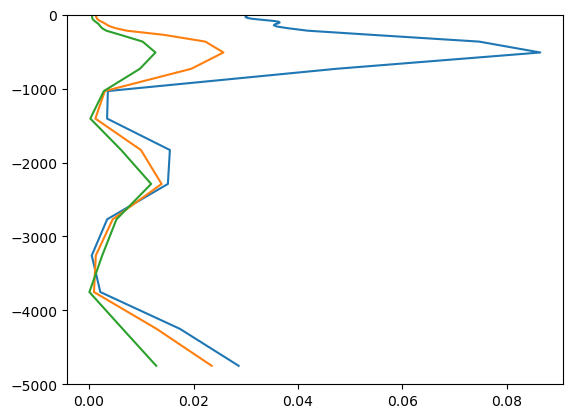

In [4]:
gp.prof_anomaly('z001', 2000, 2250, 'to')
gp.prof_anomaly('z001', 2050, 2250, 'to')
gp.prof_anomaly('z001', 2100, 2250, 'to')
plt.ylim(-5000,0)

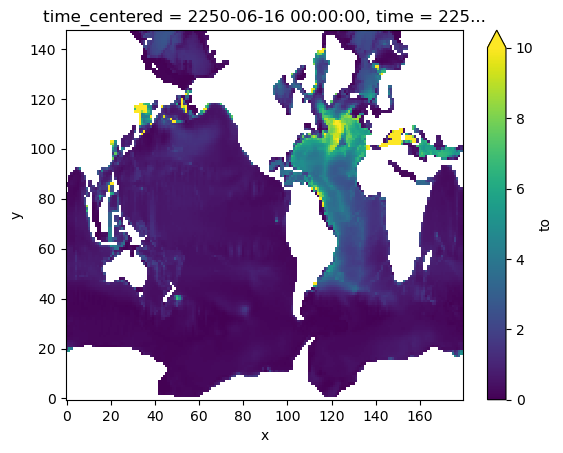

In [7]:
gp.map3d_anomaly('z001', 2100, 2250, 6, 'to', 0, 10)

Text(0, 0.5, 'Global Mean Temperature')

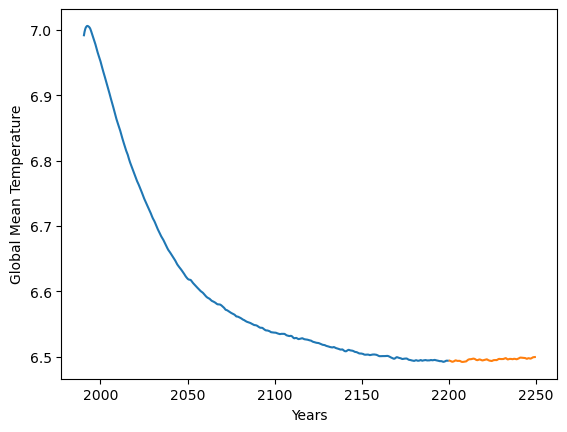

In [2]:
gp.plot_ts_ma3d('chet', 1990, 2200, 'to', 1, 'norm')
gp.plot_ts_ma3d('chet', 2200, 2250, 'to', 1, 'norm')
plt.xlabel("Years")
plt.ylabel("Global Mean Temperature")

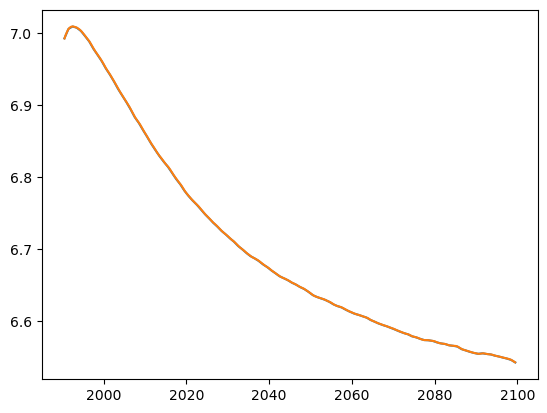

In [2]:
gp.plot_ts_ave3d('z002', 1990, 2100, 'to', 1, 'norm')
gp.plot_ts_ma3d('z001', 1990, 2100, 'to', 1, 'norm')

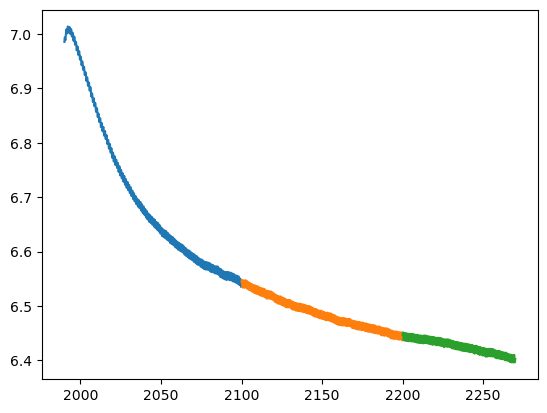

In [4]:
gp.plot_ts_ave3d('z001', 1990, 2100, 'to', 1, 'norm')
gp.plot_ts_ave3d('z001', 2100, 2200, 'to', 1, 'norm')
gp.plot_ts_ave3d('z001', 2200, 2270, 'to', 1, 'norm')

In [2]:
ave = gm.ave_T_window('z001', 2250, 2270, 'to')

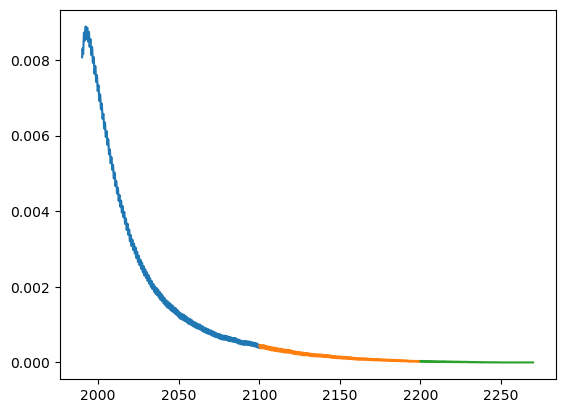

In [3]:
gp.plot_ts_ave3d('z001', 1990, 2100, 'to', ave, 'rvar')
gp.plot_ts_ave3d('z001', 2100, 2200, 'to', ave, 'rvar')
gp.plot_ts_ave3d('z001', 2200, 2270, 'to', ave, 'rvar')

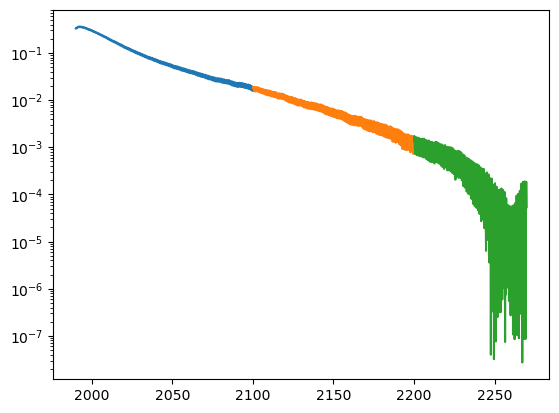

In [5]:
gp.plot_ts_ave3d('z001', 1990, 2100, 'to', ave, 'var')
gp.plot_ts_ave3d('z001', 2100, 2200, 'to', ave, 'var')
gp.plot_ts_ave3d('z001', 2200, 2270, 'to', ave, 'var')
plt.yscale('log')

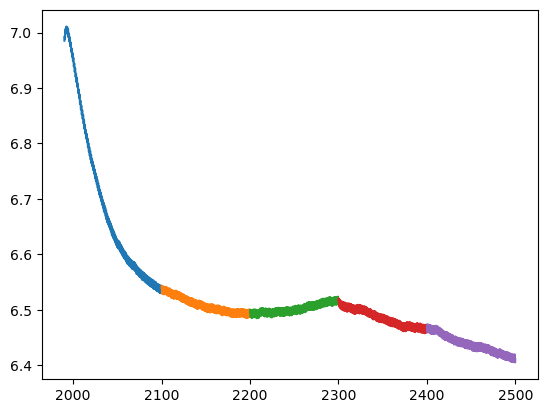

In [2]:
gp.plot_ts_ave3d('chet', 1990, 2100, 'to', 1, 'norm')
gp.plot_ts_ave3d('chet', 2100, 2200, 'to', 1, 'norm')
gp.plot_ts_ave3d('chet', 2200, 2300, 'to', 1, 'norm')
gp.plot_ts_ave3d('chev', 2300, 2400, 'to', 1, 'norm')
gp.plot_ts_ave3d('chev', 2400, 2500, 'to', 1, 'norm')

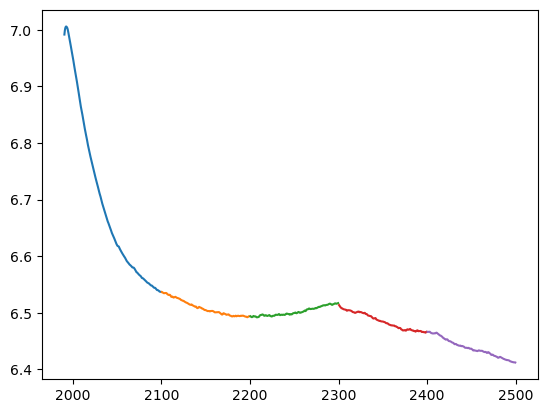

In [8]:
gp.plot_ts_ma3d('chet', 1990, 2100, 'to', 1, 'norm')
gp.plot_ts_ma3d('chet', 2100, 2200, 'to', 1, 'norm')
gp.plot_ts_ma3d('chet', 2200, 2300, 'to', 1, 'norm')
gp.plot_ts_ma3d('chev', 2300, 2400, 'to', 1, 'norm')
gp.plot_ts_ma3d('chev', 2400, 2500, 'to', 1, 'norm')

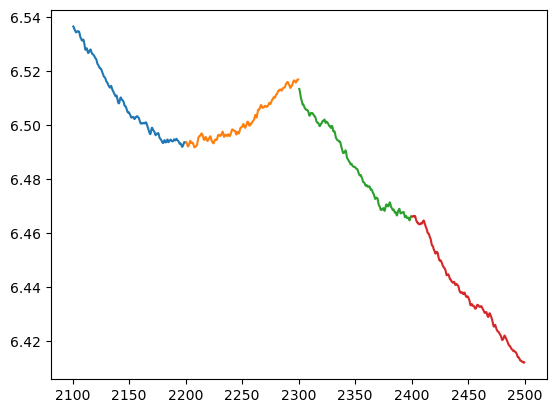

In [5]:
gp.plot_ts_ma3d('chet', 2100, 2200, 'to', 1, 'norm')
gp.plot_ts_ma3d('chet', 2200, 2300, 'to', 1, 'norm')
gp.plot_ts_ma3d('chev', 2300, 2400, 'to', 1, 'norm')
gp.plot_ts_ma3d('chev', 2400, 2500, 'to', 1, 'norm')

In [8]:
ave = gm.ave_T_window('chet', 2200, 2250, 'to')
#ave = 6.49551273;

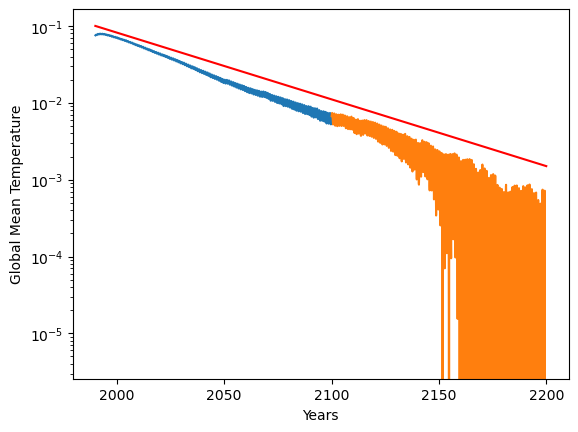

In [9]:
#gp.plot_ts_ave3d('chet', 1990, 2100, 'to', ave, 1)
gp.plot_ts_ave3d('chet', 1990, 2100, 'to', ave, 'rel')
gp.plot_ts_ave3d('chet', 2100, 2200, 'to', ave, 'rel')
plt.xlabel("Years")
plt.ylabel("Global Mean Temperature")
plt.yscale('log')
x = np.linspace(1990, 2200, 100)
plt.plot(x, 0.1*np.exp(-(x-1990)*0.02), color='red')

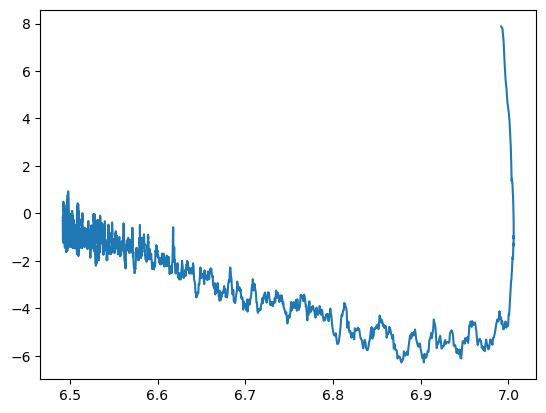

In [10]:
gp.gregory_plot_ma3d('chet', 1990, 2200, 'to', 'qt_oce')

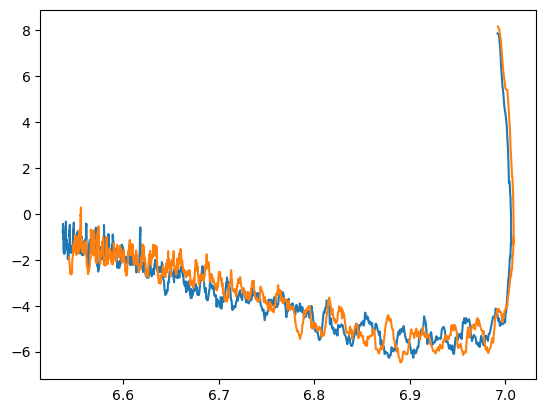

In [11]:
gp.gregory_plot_ma3d('chet', 1990, 2100, 'to', 'qt_oce')
gp.gregory_plot_ma3d('z001', 1990, 2100, 'to', 'qt_oce')

In [ ]:
gp.plot_ts_ma3d('chet', 1990, 2100, 'to', 1, 'norm')

In [8]:
gp.plot_ts_ra3d('z001', 1990, 2250, 'to')

KeyboardInterrupt: 

In [5]:
x = [1, 0.1, 0.05, 0.02, 0.01]
y = np.cumsum(x)
for i in range(1,len(y)):
    y[i]=y[i]/(i+1)
y

array([1.        , 0.55      , 0.38333333, 0.2925    , 0.236     ])

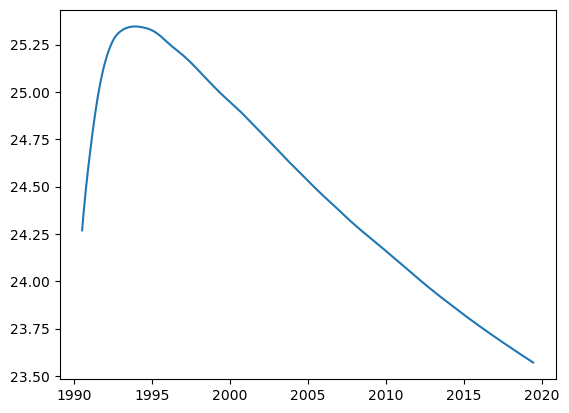

In [3]:
gp.plot_ts_ra2d('z001', 1990, 2020, 'tos')

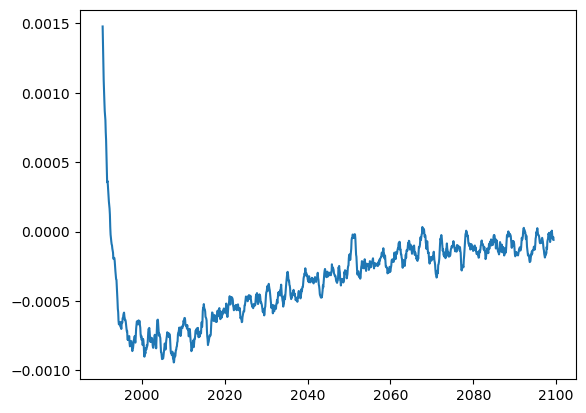

In [5]:
gp.plot_ts_ma3d_dt('chet', 1990, 2100, 'to', 1, 'norm')

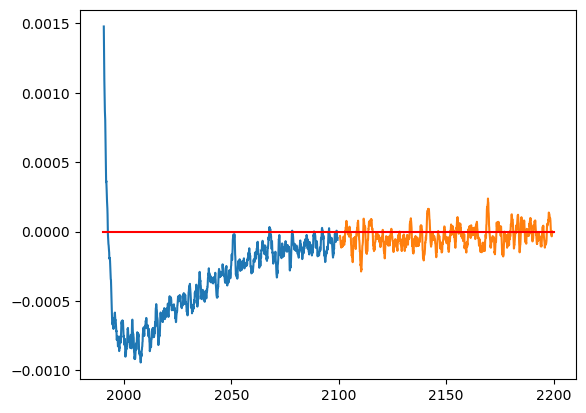

In [4]:
gp.plot_ts_ma3d_dt('chet', 1990, 2100, 'to', 1, 'norm')
gp.plot_ts_ma3d_dt('chet', 2100, 2200, 'to', 1, 'norm')
x = np.linspace(1990, 2200, 100)
plt.plot(x, 0.0*x, color='red')

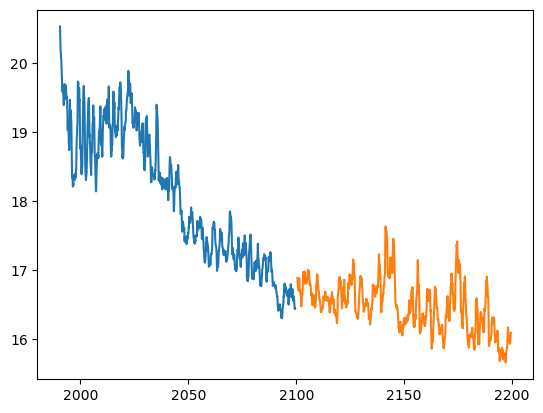

In [7]:
gp.plot_ts_ma3d_xyz('chet', 1990, 2100, 'to', 80, 80, 10, 1, 'norm')
gp.plot_ts_ma3d_xyz('chet', 2100, 2200, 'to', 80, 80, 10, 1, 'norm')